In [1]:
from sleap_roots.points import is_line_valid, associate_lateral_to_primary, flatten_associated_points
from sleap_roots.lengths import get_min_distance_line_to_line
from sleap_roots.series import find_all_series, Series
from sleap_roots.trait_pipelines import MultipleDicotPipeline, Pipeline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from shapely.geometry import LineString, Point
from shapely.ops import nearest_points
from matplotlib.collections import LineCollection

In [2]:
def plot_root_associations(associations: dict):
    """
    Plots the associations between primary and lateral roots, including the line
    connecting the closest points between each lateral root and its closest primary root,
    and ensures the color map does not include red. Adds explanations in the legend and
    inverts the y-axis for image coordinate system.

    Args:
        associations: The output dictionary from associate_lateral_to_primary function.
    """
    plt.figure(figsize=(12, 10))

    # Generate a color map for primary roots, excluding red
    cmap = plt.cm.viridis  # Using viridis which doesn't contain red
    colors = cmap(np.linspace(0, 1, len(associations)))

    for primary_index, data in associations.items():
        primary_points = data['primary_points']
        lateral_points_list = data['lateral_points']
        color = colors[primary_index]

        # Convert primary points to LineString
        primary_line = LineString(primary_points)

        # Plot primary root
        plt.plot(primary_points[:, 0], primary_points[:, 1], color=color, linewidth=2)

        # Plot each associated lateral root
        for lateral_points in lateral_points_list:
            # Convert lateral points to LineString
            lateral_line = LineString(lateral_points)
            plt.plot(lateral_points[:, 0], lateral_points[:, 1], color=color, linestyle='--', linewidth=1)

            # Use nearest_points to find the closest points between the two lines
            p1, p2 = nearest_points(primary_line, lateral_line)
            plt.plot([p1.x, p2.x], [p1.y, p2.y], 'r--', linewidth=1)

    # Invert y-axis
    plt.gca().invert_yaxis()

    # Custom legend
    custom_lines = [Line2D([0], [0], color='black', lw=2),
                    Line2D([0], [0], color='black', lw=2, linestyle='--'),
                    Line2D([0], [0], color='red', lw=1, linestyle='--')]
    plt.legend(custom_lines, ['Primary Root', 'Lateral Root', 'Minimum Distance'])

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Primary and Lateral Root Associations with Minimum Distances')
    plt.axis('equal')  # Ensure equal aspect ratio for x and y axes
    plt.show()

In [3]:
# Load proofread test data
folder_path = "tests\data\multiple_arabidopsis_11do"
all_series = find_all_series(folder_path)
all_series = [Series.load(s, primary_name="primary", lateral_name="lateral") for s in all_series]
all_series

Lateral prediction file not found: tests/data/multiple_arabidopsis_11do/8426_1.lateral.predictions.slp
Primary prediction file not found: tests/data/multiple_arabidopsis_11do/9902_2.primary.predictions.slp


[Series(h5_path='tests/data/multiple_arabidopsis_11do/6039_1.h5', primary_labels=Labels(labeled_frames=67, videos=1, skeletons=1, tracks=0), lateral_labels=Labels(labeled_frames=68, videos=1, skeletons=1, tracks=0), crown_labels=None, video=Video(filename="tests/data/multiple_arabidopsis_11do/6039_1.h5", shape=(72, 1088, 2048, 1), dataset=vol, backend=HDF5Video), csv_path=None),
 Series(h5_path='tests/data/multiple_arabidopsis_11do/7327_2.h5', primary_labels=Labels(labeled_frames=43, videos=1, skeletons=1, tracks=0), lateral_labels=Labels(labeled_frames=31, videos=1, skeletons=1, tracks=0), crown_labels=None, video=Video(filename="tests/data/multiple_arabidopsis_11do/7327_2.h5", shape=(72, 1088, 2048, 1), dataset=vol, backend=HDF5Video), csv_path=None),
 Series(h5_path='tests/data/multiple_arabidopsis_11do/8426_1.h5', primary_labels=Labels(labeled_frames=36, videos=1, skeletons=1, tracks=0), lateral_labels=None, crown_labels=None, video=Video(filename="tests/data/multiple_arabidopsis_1

In [4]:
frame_index = 2

In [5]:
small_cyl_index = 0

In [6]:
small_cyl = all_series[small_cyl_index]
small_cyl

Series(h5_path='tests/data/multiple_arabidopsis_11do/6039_1.h5', primary_labels=Labels(labeled_frames=67, videos=1, skeletons=1, tracks=0), lateral_labels=Labels(labeled_frames=68, videos=1, skeletons=1, tracks=0), crown_labels=None, video=Video(filename="tests/data/multiple_arabidopsis_11do/6039_1.h5", shape=(72, 1088, 2048, 1), dataset=vol, backend=HDF5Video), csv_path=None)

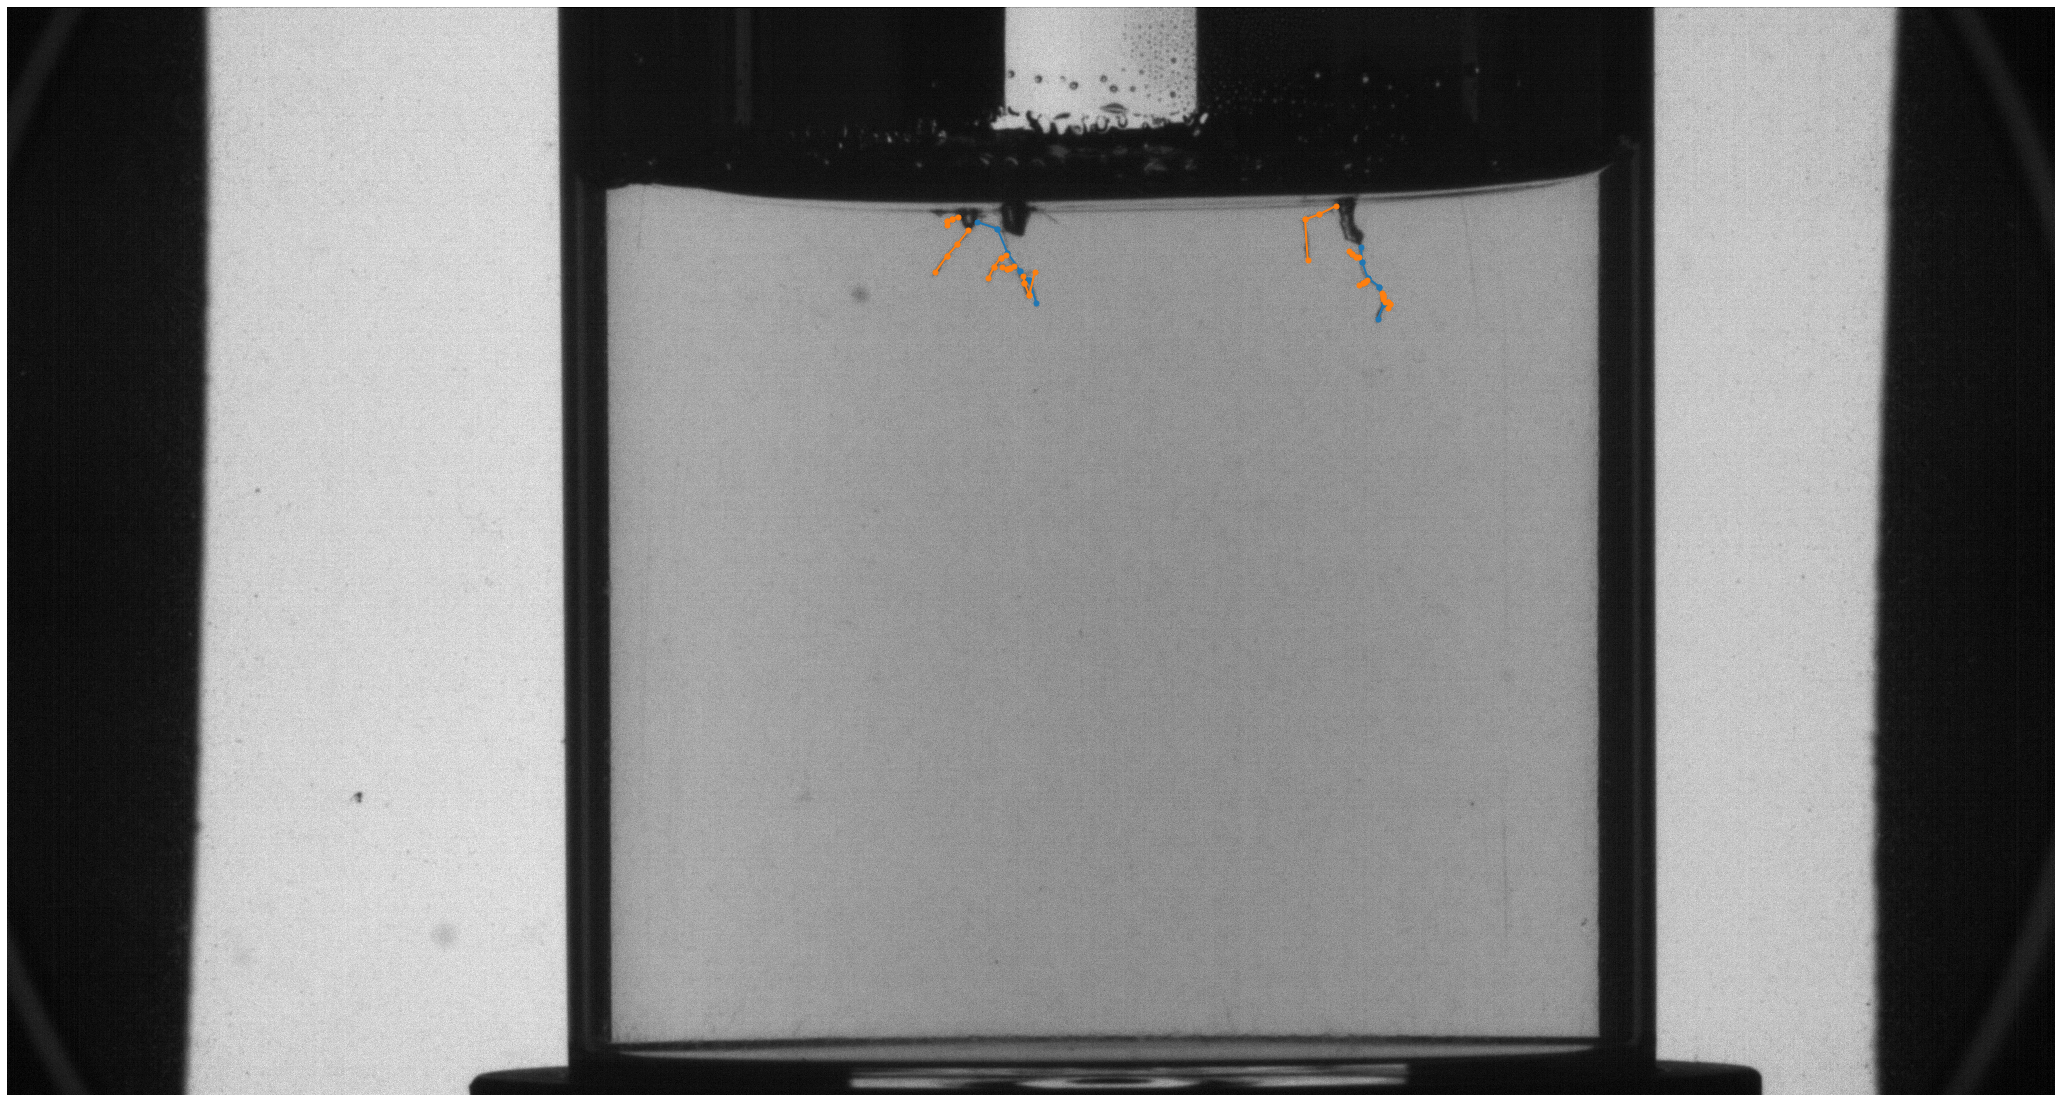

In [7]:
small_cyl.plot(frame_index)

In [8]:
small_primary_pts = small_cyl.get_primary_points(frame_index)
print(f"Shape of primary points: {small_primary_pts.shape}")
small_lateral_pts = small_cyl.get_lateral_points(frame_index)
print(f"Shape of lateral points: {small_lateral_pts.shape}")

Shape of primary points: (2, 6, 2)
Shape of lateral points: (10, 4, 2)


In [ ]:
pipeline = pipeline.